In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [42]:
air_data=pd.read_excel('Airlines+Data.xlsx',index_col=0, parse_dates=True)  

In [43]:
air_data# here Month is rendered as index column

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [20]:
air_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [21]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


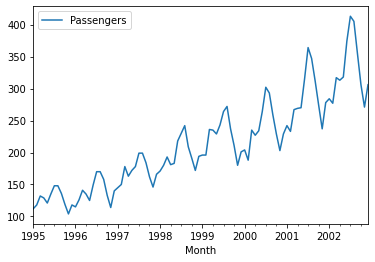

In [22]:
air_data.plot()#we can observe from below visualization that it appears to be upward trend multiplicative seasonality 

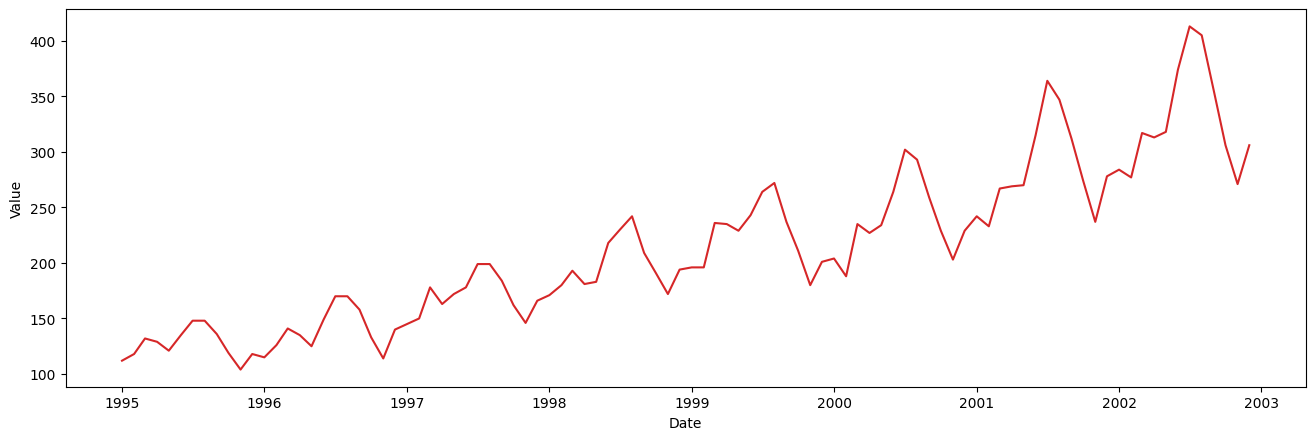

In [23]:
# Draw Plot#from below plot we can observe that it is an linearly upward trending Multiplicative seasonality
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(air_data, x=air_data.index, y=air_data.Passengers)

In [50]:
#creating new column in dataset which is for counting months on every year.
air_data['months'] = pd. DatetimeIndex(air_data.index).month

In [51]:
air_data

,Passengers,month,months
Month,,,
1995-01-01,112,1,1
1995-02-01,118,2,2
1995-03-01,132,3,3
1995-04-01,129,4,4
1995-05-01,121,5,5
...,...,...,...
2002-08-01,405,8,8
2002-09-01,355,9,9
2002-10-01,306,10,10


In [52]:
air_data_new=air_data.drop(["month"], axis=1)

In [53]:
air_data_new.describe()

,Passengers,months
count,96.000000,96.000000
mean,213.708333,6.500000
std,71.918216,3.470174
min,104.000000,1.000000
25%,156.000000,3.750000
50%,200.000000,6.500000
75%,264.750000,9.250000
max,413.000000,12.000000


In [54]:
df_dummies = pd.DataFrame(pd.get_dummies(air_data['months']))

In [55]:
df_dummies

,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1995-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-01,0,0,0,0,0,0,0,0,1,0,0,0
2002-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
df =pd.concat([air_data_new,df_dummies],axis= 1)

In [57]:
df

,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,,,
1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,8,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-01,355,9,0,0,0,0,0,0,0,0,1,0,0,0
2002-10-01,306,10,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
#Square Transformations
from numpy import sqrt
from pandas import DataFrame
df['t']  =np.arange(1,97)
df['t_squared']=df['t'] **2

In [60]:
#log Transformations
from numpy import log
df['log_passengers'] =log(df['Passengers'])

In [61]:
df

,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_passengers
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,8,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
2002-09-01,355,9,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118
2002-10-01,306,10,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.723585


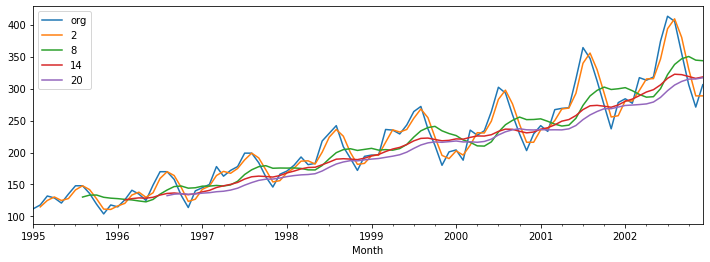

In [62]:
plt.figure(figsize=(12,4))#Moving Average Plot
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

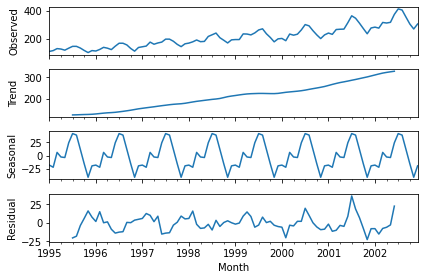

In [63]:
decompose_ts_add = seasonal_decompose(df.Passengers,freq=12)#Time Series decomposition plot.
decompose_ts_add.plot()
plt.show()

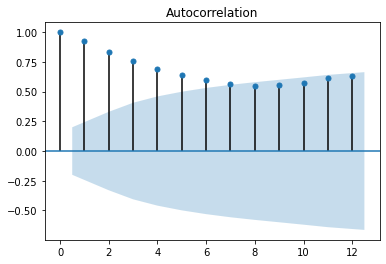

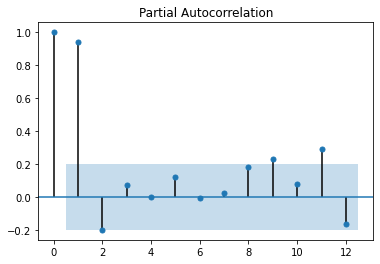

In [64]:
#ACF and PACF Plot
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

In [65]:
#Spitting data into train and test for error evaluation
split_point = len(df) - 12

In [66]:
train, test = df[0:split_point], df[split_point:]

In [67]:
train

,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_passengers
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-08-01,347,8,0,0,0,0,0,0,0,1,0,0,0,0,80,6400,5.849325
2001-09-01,312,9,0,0,0,0,0,0,0,0,1,0,0,0,81,6561,5.743003
2001-10-01,274,10,0,0,0,0,0,0,0,0,0,1,0,0,82,6724,5.613128


In [68]:
test

,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_passengers
Month,,,,,,,,,,,,,,,,,
2002-01-01,284,1,1,0,0,0,0,0,0,0,0,0,0,0,85,7225,5.648974
2002-02-01,277,2,0,1,0,0,0,0,0,0,0,0,0,0,86,7396,5.624018
2002-03-01,317,3,0,0,1,0,0,0,0,0,0,0,0,0,87,7569,5.758902
2002-04-01,313,4,0,0,0,1,0,0,0,0,0,0,0,0,88,7744,5.746203
2002-05-01,318,5,0,0,0,0,1,0,0,0,0,0,0,0,89,7921,5.762051
2002-06-01,374,6,0,0,0,0,0,1,0,0,0,0,0,0,90,8100,5.924256
2002-07-01,413,7,0,0,0,0,0,0,1,0,0,0,0,0,91,8281,6.023448
2002-08-01,405,8,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
2002-09-01,355,9,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118


In [69]:
def MAPE(pred,org):    #Mean Absolute percentage error
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [71]:
#Simple Explonential method
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


13.411274740513653

In [75]:

from sklearn.metrics import mean_squared_error

In [79]:

#linear Models
import statsmodels.formula.api as smf
linear_model =smf.ols('Passengers~t',data=train).fit()
pred_linear =pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
linear_rmse =np.sqrt(mean_squared_error((np.array(test['Passengers'])),(np.array(pred_linear))))
linear_rmse

53.19923653480278

In [76]:

#Exponential Models
import statsmodels.formula.api as smf
exp_model =smf.ols("log_passengers~t",data =train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
exp_rmse =np.sqrt(mean_squared_error((np.array(test['Passengers'])),(np.array(pred_exp))))
exp_rmse

325.71506135515364

In [77]:
#Quadratic Models
quad_model =smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
quad_rmse =np.sqrt(mean_squared_error((np.array(test['Passengers'])),(np.array(pred_quad))))
quad_rmse

48.051888979330926

In [80]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,48.051889
0,rmse_linear,53.199237
1,rmse_exp,325.715061


In [72]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


23.530719652099922

In [73]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1.6177582345226866

In [81]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2.8203589155579554

In [84]:
#we concur that Holts winter exponential smoothing with additive seasonality and additive trend has lowest error so we finalize this model

In [82]:
final_model = ExponentialSmoothing(df["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [83]:
final_model.forecast(10)#Forecasting for further 10 time periods

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060923
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762460
2003-10-01    336.170254
Freq: MS, dtype: float64